In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from netCDF4 import Dataset

In [3]:
path = r"./netcdf/WI937_2020004132603.NGI"

In [4]:
rootgrp = Dataset(path, "r", format="NETCDF4")

In [5]:
rootgrp

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    format_version: 1.10
    id: ionogram.WI937_2020004132603
    naming_authority: gov.noaa.ngdc
    Metadata_Link: http://www.ngdc.noaa.gov/ionosonde/documentation/
    title: Ionosonde Data
    station: Wallops Island
    instrument: Vertical Incidence Pulsed Ionospheric Radar
    cdm_data_type: Station
    processing_level: Power Average
    experiment: Routine Observations
    date_created: 2020-01-04T13:33:00Z
    date_modified: 2020-01-04T13:33:00Z
    date_issued: 2020-01-04T13:33:00Z
    time_coverage_start: 2020-01-04T13:26:03Z
    time_coverage_end: 2020-01-04T13:27:47Z
    time_coverage_duration: TM01S44
    time_coverage_resolution: none
    geospatial_lat_min:     37.837
    geospatial_lat_max:     38.037
    geospatial_lat_units: degrees
    geospatial_lat_resolution: none
    geospatial_lon_min:    -75.578
    geospatial_lon_max:    -75.378
    geospatial_lon_units: degrees


In [6]:
for dimobj in rootgrp.dimensions.values():
    print(dimobj)

<class 'netCDF4._netCDF4.Dimension'>: name = 'NumRange', size = 960

<class 'netCDF4._netCDF4.Dimension'>: name = 'NumFrequency', size = 328

<class 'netCDF4._netCDF4.Dimension'>: name = 'NumDoppler', size = 1

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM002', size = 2

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM003', size = 3

<class 'netCDF4._netCDF4.Dimension'>: name = 'NumRxPair', size = 4

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM008', size = 8

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM016', size = 16

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM032', size = 32

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM064', size = 64

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM128', size = 128

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM160', size = 160

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM256', size = 256

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM512', size = 512

<class 'netCDF4._netCDF4.Dimension'>: name = 'DIM1024', size

In [7]:
rootgrp.dimensions

OrderedDict([('NumRange',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'NumRange', size = 960),
             ('NumFrequency',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'NumFrequency', size = 328),
             ('NumDoppler',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'NumDoppler', size = 1),
             ('DIM002',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'DIM002', size = 2),
             ('DIM003',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'DIM003', size = 3),
             ('NumRxPair',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'NumRxPair', size = 4),
             ('DIM008',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'DIM008', size = 8),
             ('DIM016',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'DIM016', size = 16),
             ('DIM032',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'DIM032', size = 32),
             ('DIM064',
    

In [8]:
rootgrp.dimensions['NumRange']

<class 'netCDF4._netCDF4.Dimension'>: name = 'NumRange', size = 960

In [9]:
rootgrp.variables.keys()


odict_keys(['URSI', 'StationName', 'year', 'daynumber', 'month', 'day', 'hour', 'minute', 'second', 'epoch', 'latitude', 'longitude', 'altitude', 'MagLat', 'MagLon', 'MagDip', 'GyroFreq', 'pri', 'range_gate_offset', 'gate_count', 'gate_start', 'gate_end', 'gate_step', 'Range0', 'freq_start', 'freq_end', 'tune_type', 'freq_count', 'linear_step', 'log_step', 'Magic', 'SCT_version', 'SCT_readme', 'SCT_user', 'decimation_method', 'decimation_threshold', 'station_file_id', 'rx_name', 'rx_latitude', 'rx_longitude', 'rx_altitude', 'rx_count', 'rx_antenna_type', 'rx_position', 'rx_direction', 'rx_height', 'rx_cable_length', 'frontend_atten', 'tx_name', 'tx_latitude', 'tx_longitude', 'tx_altitude', 'tx_antenna_type', 'tx_vector', 'tx_height', 'tx_cable_length', 'drive_band_count', 'drive_band_bounds', 'drive_band_atten', 'rf_control', 'ref_type', 'clock_type', 'station_user', 'timing_file_id', 'pri_count', 'ionogram_count', 'holdoff', 'data_start', 'date_width', 'data_baud_count', 'data_wave_fi

In [10]:
zz=rootgrp.variables['Range']
zz

<class 'netCDF4._netCDF4.Variable'>
float32 Range(NumRange)
    description: Radar Range
    units: kilometer
unlimited dimensions: 
current shape = (960,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [11]:
zz.description + '('+zz.units+')'

'Radar Range(kilometer)'

In [12]:
zz=rootgrp.station

In [13]:
zz

'Wallops Island'

In [14]:
rootgrp.variables['total_power']

<class 'netCDF4._netCDF4.Variable'>
float32 total_power(NumFrequency, NumRange)
    description: total received power
    units: decibel
unlimited dimensions: 
current shape = (328, 960)
filling on, default _FillValue of 9.969209968386869e+36 used

In [15]:
rootgrp.variables['total_noise']

<class 'netCDF4._netCDF4.Variable'>
float32 total_noise(NumFrequency)
    description: Total Power Noise Level
    units: decibel
unlimited dimensions: 
current shape = (328,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [16]:

total_power = rootgrp.variables['total_power'][:,:]
total_noise = rootgrp.variables['total_noise'][:]

In [17]:
def to_axis(x, type='linear'):
    """
    for purposes of plt.colormesh, converts x from pixel midpoints to lower bounds
    """
    if type == 'linear':
        mean_diff = (x[1:] - x[0:-1]).mean()
        
        #tack extra value on the end
        temp_x = np.array(x.tolist() + [x[-1]+mean_diff])
        
        #shift down half a notch
        temp_x -= mean_diff/2
    elif type == 'geometric':
        growth = (x[1:]/x[0:-1]).mean() # mean ratio between successive elements
        
        # put imputed values on beginning and end
        temp_x = np.array([x[0]/growth]+x.tolist() + [x[-1]*growth])
        temp_x = (temp_x[1:] + temp_x[0:-1])/2.0 # mean distance btwn successive elements
    else:
        raise ValueError(f'Extrapolation type: \'{type}\' not implemented')
        
    return temp_x

In [18]:
rng = rootgrp.variables['Range'][:]
freq = rootgrp.variables['Frequency'][:]
#range and frequency buckets
rng_b= to_axis(rng, type='linear')
freq_b = to_axis(freq, type='geometric')

In [19]:
xx = 13*1.005**np.arange(10)

In [20]:
xx

array([13.        , 13.065     , 13.130325  , 13.19597662, 13.26195651,
       13.32826629, 13.39490762, 13.46188216, 13.52919157, 13.59683753])

In [21]:
to_axis(xx, 'geometric')

array([12.96766169, 13.0325    , 13.0976625 , 13.16315081, 13.22896657,
       13.2951114 , 13.36158696, 13.42839489, 13.49553687, 13.56301455,
       13.63082962])

In [22]:
to_axis(xx,'linear')

array([12.96684236, 13.03184236, 13.09716736, 13.16281898, 13.22879887,
       13.29510865, 13.36174998, 13.42872452, 13.49603393, 13.56367989,
       13.62999517])

In [23]:
freq[100:110]/freq[99:109]

masked_array(data=[1.008996844291687, 1.0089969635009766,
                   1.008996844291687, 1.008996844291687,
                   1.0089970827102661, 1.0089969635009766,
                   1.0089969635009766, 1.0089973211288452,
                   1.0089969635009766, 1.0089972019195557],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20,
            dtype=float32)

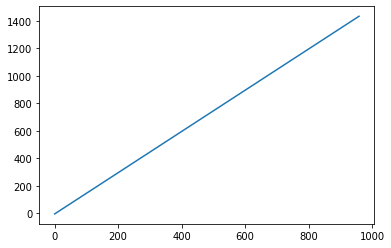

In [24]:
plt.plot(rng)

In [25]:
total_power.shape

(328, 960)

In [26]:
total_noise.shape

(328,)

In [27]:
img = total_power-total_noise.reshape(-1,1)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
%matplotlib inline

import pandas as pd

Text(0.5, 1.0, 'total received power')

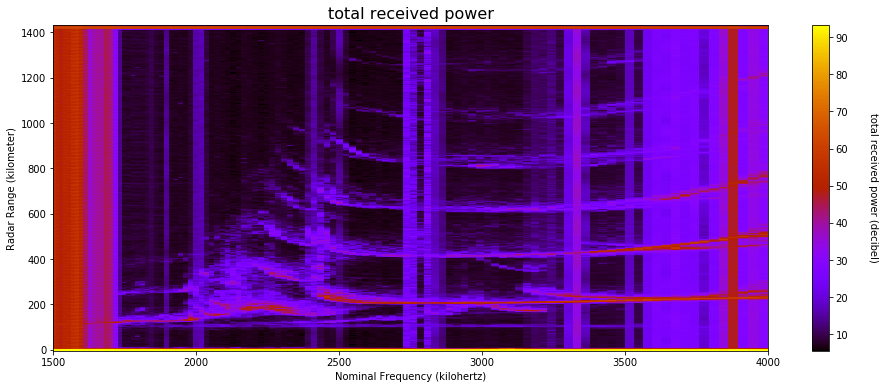

In [29]:
fig, ax = plt.subplots(figsize=(16,6))
pcm = ax.pcolormesh( freq_b, rng_b, total_power.T,
                   #norm=colors.LogNorm(vmin=img.min(), vmax=img.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='gnuplot')
y_desc = rootgrp.variables['Range']
ax.set_ylabel(f'{y_desc.description} ({y_desc.units})')
x_desc = rootgrp.variables['Frequency']
ax.set_xlabel(f'{x_desc.description} ({x_desc.units})')
ax.set_xlim(1500,4000)
cbar=fig.colorbar(pcm, ax=ax)
z_desc = rootgrp.variables['total_power']
cbar.set_label(f'{z_desc.description} ({z_desc.units})', rotation=270, labelpad=30)
ax.set_title(z_desc.description,fontsize=16)

(1500, 4000)

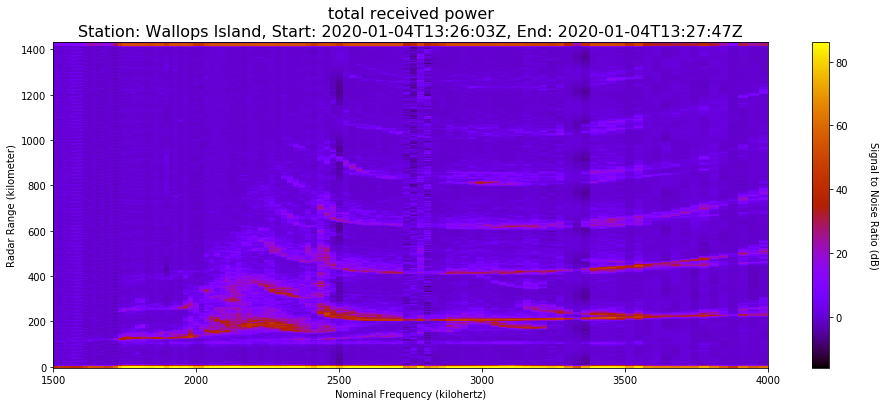

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
pcm = ax.pcolormesh( freq_b, rng_b, img.T,
                   #norm=colors.LogNorm(vmin=img.min(), vmax=img.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='gnuplot')
y_desc = rootgrp.variables['Range']
ax.set_ylabel(f'{y_desc.description} ({y_desc.units})')
x_desc = rootgrp.variables['Frequency']
ax.set_xlabel(f'{x_desc.description} ({x_desc.units})')
#ax.set_xlim(1500,4000)
cbar=fig.colorbar(pcm, ax=ax)
z_desc = rootgrp.variables['total_power']
cbar.set_label('Signal to Noise Ratio (dB)', rotation=270, labelpad=30)
ax.set_title('{0}\nStation: {1}, Start: {2}, End: {3}'.format(z_desc.description, rootgrp.station,
                                                                    rootgrp.time_coverage_start, rootgrp.time_coverage_end
                                                                    ),fontsize=16)
ax.set_xlim(1500,4000)

In [31]:
thresh = img.mean()+img.std()*2.0
np.where(img >= thresh, img, 0.0).shape

(328, 960)

In [32]:
thresh

19.669102668762207

(1500, 4000)

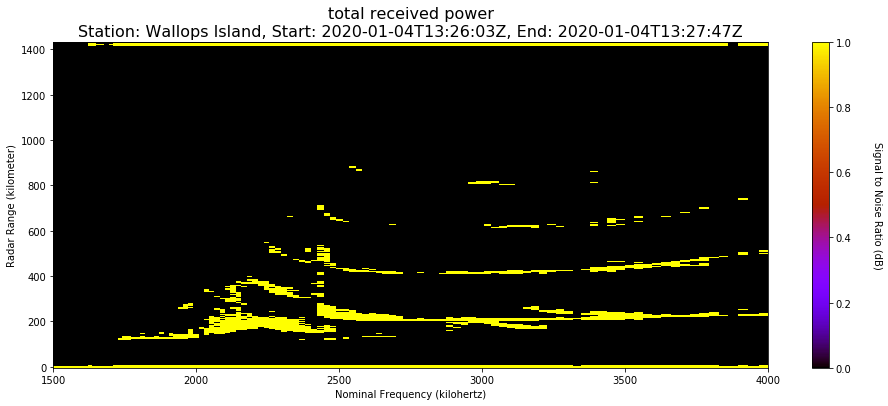

In [33]:

fig, ax = plt.subplots(figsize=(16,6))
pcm = ax.pcolormesh( freq_b, rng_b, np.where(img>thresh, 1.0, 0.0).T,
                   #norm=colors.LogNorm(vmin=img.min(), vmax=img.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='gnuplot')
y_desc = rootgrp.variables['Range']
ax.set_ylabel(f'{y_desc.description} ({y_desc.units})')
x_desc = rootgrp.variables['Frequency']
ax.set_xlabel(f'{x_desc.description} ({x_desc.units})')
#ax.set_xlim(1500,4000)
cbar=fig.colorbar(pcm, ax=ax)
z_desc = rootgrp.variables['total_power']
cbar.set_label('Signal to Noise Ratio (dB)', rotation=270, labelpad=30)
ax.set_title('{0}\nStation: {1}, Start: {2}, End: {3}'.format(z_desc.description, rootgrp.station,
                                                                    rootgrp.time_coverage_start, rootgrp.time_coverage_end
                                                                    ),fontsize=16)
ax.set_xlim(1500,4000)

In [86]:
from scipy import ndimage

In [138]:
labs,nfeat = ndimage.label(np.where(img>thresh, 1.0, 0.0).T)

In [139]:
objs = ndimage.find_objects(labs)

In [140]:
areas = pd.DataFrame([[s[0].start, s[0].stop, s[1].start, s[1].stop] for s in objs], columns=\
                    ['rng_start_i', 'rng_stop_i', 'freq_start_i', 'freq_stop_i'])

In [141]:
areas['Area']=(areas.rng_stop_i-areas.rng_start_i)*(areas.freq_stop_i-areas.freq_start_i)

In [142]:
def to_freq_rng(freq, rng, s):
    start_x_i = s[0].start
    stop_x_i = min([s[0].stop, len(rng)-1])
    start_y_i = s[1].start
    stop_y_i = min([s[1].stop,len(freq)-1])
    freq_start = freq[start_y_i]; freq_stop = freq[stop_y_i]
    rng_start = rng[start_x_i]; rng_stop = rng[stop_x_i]
    
    return freq_start, freq_stop, rng_start, rng_stop
    

In [143]:
def show_trace(cdf, ax=ax, feat=None, thresh=18.0):
    
    rng = cdf.variables['Range'][:]
    freq = cdf.variables['Frequency'][:]
    total_power = cdf.variables['total_power'][:,:].T
    total_noise = cdf.variables['total_noise'][:]
    img = total_power-total_noise.reshape(1,-1)
    
    pcm = ax.pcolormesh( freq, rng, img,
                        #np.where(img>thresh, 1.0, 0.0),
                   #norm=colors.LogNorm(vmin=img.min(), vmax=img.max()), #uncomment for log normalized
                    #norm=colors.PowerNorm(gamma=1./2.),
                    cmap='gnuplot')
    y_desc = cdf.variables['Range']
    ax.set_ylabel(f'{y_desc.description} ({y_desc.units})')
    x_desc = cdf.variables['Frequency']
    ax.set_xlabel(f'{x_desc.description} ({x_desc.units})')
    #ax.set_xlim(1500,4000)
    cbar=fig.colorbar(pcm, ax=ax)
    z_desc = cdf.variables['total_power']
    cbar.set_label('Signal to Noise Ratio (dB)', rotation=270, labelpad=30)
    ax.set_title('{0}\nStation: {1}, Start: {2}, End: {3}'.format(z_desc.description, rootgrp.station,
                                                                        rootgrp.time_coverage_start, rootgrp.time_coverage_end
                                                                        ),fontsize=16)
    ax.set_xlim(freq.min(),4000)

In [144]:
areas.sort_values('Area', ascending=False).head(20)

,rng_start_i,rng_stop_i,freq_start_i,freq_stop_i,Area
38,147,266,104,207,12257
111,602,775,115,173,10034
176,899,960,77,227,9150
50,297,379,114,198,6888
0,0,10,0,678,6780
70,455,498,140,181,1763
191,948,957,459,574,1035
192,948,957,575,678,927
185,944,957,248,310,806
40,156,174,183,226,774


In [159]:
from matplotlib import cm
cmap = cm.get_cmap('tab20')

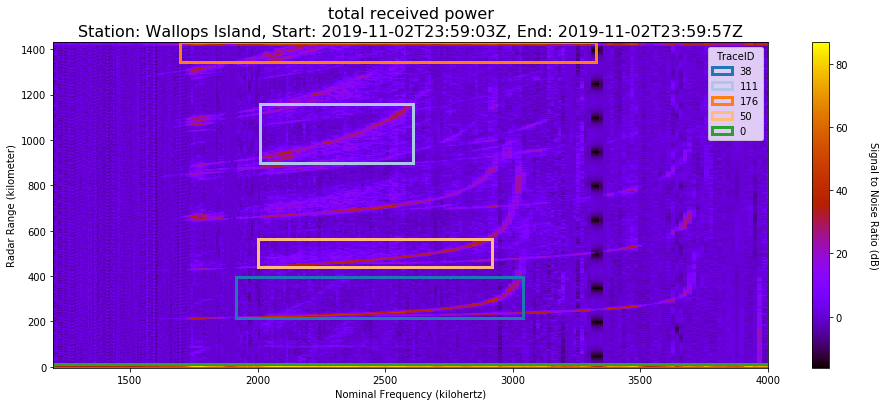

In [167]:
which =176
freq_start, freq_stop, rng_start, rng_stop = to_freq_rng(freq, rng, objs[which])
fig, ax = plt.subplots(figsize=(16,6))

show_trace(rootgrp, ax)

slices = areas.sort_values('Area', ascending=False).head(5).index
for c,s in enumerate(slices):
    freq_start, freq_stop, rng_start, rng_stop = to_freq_rng(freq, rng, objs[s])
    r = Rectangle((freq_start, rng_start),freq_stop-freq_start, rng_stop-rng_start,
                  label=str(s), alpha=1.0,
                  ec=cmap(c), facecolor='None',ls='-',lw=3)
    ax.add_patch(r)
    #ax.annotate(str(s),(freq_start, rng_start))
    
ax.legend(title='TraceID')
    


In [153]:
min([2,3])

2

In [157]:
from matplotlib import cm
cmap = cm.get_cmap('tab20')
colors=[cmap(0),cmap(75),cmap(150),cmap(225)]

In [158]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)]

In [161]:
slices = areas.sort_values('Area', ascending=False).head(20).index

In [162]:
slices

Int64Index([ 38, 111, 176,  50,   0,  70, 191, 192, 185,  40, 105, 190,  62,
            153,  68,  65, 138, 189, 134, 188],
           dtype='int64')

In [163]:
[cmap(s) for s in slices]

[(0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0),
 (0.6196078431372549, 0.8549019607843137, 0.898

In [164]:
[cmap(i) for i in range(20)]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.7333333333333333, 0.47058823529411764, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (1.0, 0.596078431372549, 0.5882352941176471, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7803921568627451